In [20]:
#Importanto bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms

In [2]:
pip install openpyxl

     |████████████████████████████████| 242 kB 40.4 MB/s            
You should consider upgrading via the '/opt/python/envs/default/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [3]:
vendas = pd.read_excel('comissao.xlsx')

In [4]:
vendas.head()

,quantidade,comissao
0,1,728
1,2,762
2,3,802
3,4,848
4,5,900


In [5]:
vendas.shape

(50, 2)

In [6]:
vendas.dtypes

In [7]:
#Passando comissão de inteiro para real
vendas = vendas.astype({"comissao": float})

In [8]:
vendas.dtypes

### Valores faltando ? - NAN

In [9]:
vendas.isnull().sum()

### Análise dos Dados

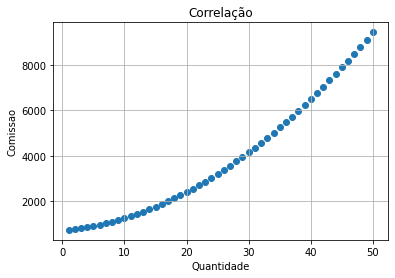

In [10]:
plt.scatter(vendas.quantidade, vendas.comissao)
plt.title('Correlação')
plt.xlabel('Quantidade')
plt.ylabel('Comissao')
plt.grid(True)
plt.show()

### Normalidade

Teste de Shapiro: 

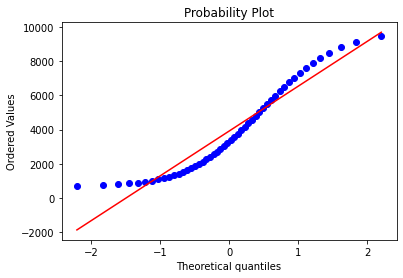

In [11]:
stats.probplot(vendas['comissao'], dist='norm', plot=plt)
plt.show()

In [12]:
estatistica, p = stats.shapiro(vendas.comissao)
print(p)

0.0012719858204945922


**Logo, a distribuição não é normal.**

Visto que:

**H0** = distriubuição normal p > 0.05

**Ha** = distribuição não normal p <= 0.5

In [13]:
coef, p = stats.pearsonr(vendas.quantidade, vendas.comissao)

In [14]:
coef

0.9771727342426183

In [15]:
p

5.979169551432808e-34

### Regressão Linear

In [16]:
regressao = smf.ols('comissao ~ quantidade', data = vendas).fit()

In [17]:
print(regressao.summary())

                            OLS Regression Results                            
Dep. Variable:               comissao   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     1016.
Date:                Thu, 13 Oct 2022   Prob (F-statistic):           5.98e-34
Time:                        14:24:26   Log-Likelihood:                -387.21
No. Observations:                  50   AIC:                             778.4
Df Residuals:                      48   BIC:                             782.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -626.0000    163.662     -3.825      0.0

- R2 = 0,95
- Prob. Estatística F = 5.98e-34
- Equação - Comissão = -626 + 178  
- R2 ajustado = 0,954

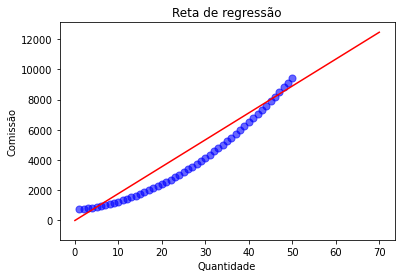

In [23]:
plt.scatter(y = vendas.comissao, x = vendas.quantidade, color = 'blue', s = 50, alpha = 0.6)
X_plot = np.linspace(0, 70)
plt.plot(X_plot, X_plot*regressao.params[1], + regressao.params[0], color = 'r')
plt.title('Reta de regressão')
plt.ylabel('Comissão')
plt.xlabel('Quantidade')
plt.show()

### Regressão Polinomial com Numpy - Grau 2

In [24]:
modelo2 = np.poly1d(np.polyfit(vendas.quantidade, vendas.comissao, 2))

In [25]:
y2 = modelo2(vendas.quantidade)
y2

In [26]:
modelo2.coef

In [37]:
print('Equação: COMISSÃO = {:.1f} + {:.1f}*quantidade + {:.1f}*quantidade^2'.format(modelo2.coef[2], modelo2.coef[1], modelo2.coef[0])) 

Equação: COMISSÃO = 700.0 + 25.0*quantidade + 3.0*quantidade^2


### Regressão Polinomial com Numpy - Grau 3

In [38]:
modelo3 = np.poly1d(np.polyfit(vendas.quantidade, vendas.comissao, 3))

In [39]:
y3 = modelo3(vendas.quantidade)
y3

In [43]:
print("Equação: COMISSÃO = {:.1f} + {:.1f}*quantidade + {:.1f}*quantidade^2 + {:.1f}*quantidade^3".format(modelo3.coef[3], modelo3.coef[2], modelo3.coef[1], modelo3.coef[0]))

Equação: COMISSÃO = 700.0 + 25.0*quantidade + 3.0*quantidade^2 + 0.0*quantidade^3


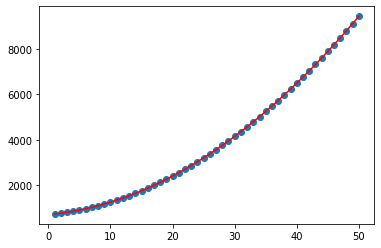

In [44]:
plt.scatter(vendas.quantidade, vendas.comissao)
plt.plot(vendas.quantidade,y3,color='red');

### Regressão Polinomial com Sklearn

In [45]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [51]:
pre_process = PolynomialFeatures(degree = 2)

In [47]:
x = vendas[['quantidade']]
y = vendas.comissao

In [48]:
x.head()

,quantidade
0,1
1,2
2,3
3,4
4,5


In [49]:
x_poly = pre_process.fit_transform(x)

In [50]:
x_poly

In [52]:
# Criação do Modelo
modelo_sk = LinearRegression()

In [53]:
modelo_sk.fit(x_poly, y)

LinearRegression()

In [54]:
y_pred = modelo_sk.predict(x_poly)

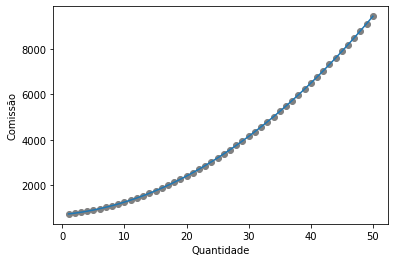

In [55]:
plt.scatter(x, y, c = "gray")
plt.xlabel("Quantidade")
plt.ylabel("Comissão")
plt.plot(x, y_pred);

In [56]:
modelo_sk.coef_

In [57]:
modelo_sk.intercept_

700.0000000000059

In [58]:
print("Equação: COMISSÃO = {:.1f} + {:.1f}*quantidade + {:.1f}*quantidade^2".format(modelo_sk.intercept_, modelo_sk.coef_[1], modelo_sk.coef_[2]))

Equação: COMISSÃO = 700.0 + 25.0*quantidade + 3.0*quantidade^2


### Previsão

In [59]:
quantidade = 72
previsao = modelo_sk.predict(pre_process.fit_transform([[quantidade]]))
print("Se vender {}, irá ganhar {:.2f} reais de comissão".format(quantidade, previsao[0]))

Se vender 72, irá ganhar 18052.00 reais de comissão


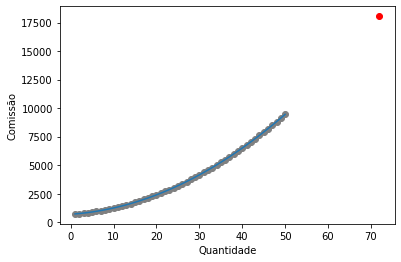

In [60]:
# Gráfico com valor previsto
plt.scatter(x, y, c = "gray")
plt.xlabel("Quantidade")
plt.ylabel("Comissão")
plt.plot(x, y_pred)
plt.scatter(72, previsao, c = "red");

### Avaliação do modelo

In [68]:
import sklearn.metrics

In [69]:
# Erro médio quadrático (MSE)
mean_squared_error(y, y_pred)

7.423687503722e-24

In [70]:
# Erro médio absoluto (MAE)
mean_absolute_error(y, y_pred)

2.3169377527665346e-12